### Context
Data has been collected from different hospitals, community clinics, maternal health cares through the IoT based risk monitoring system.

- Age: Age in years when a woman is pregnant.
- SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
- HeartRate: A normal resting heart rate in beats per minute.
- Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

### Acknowledgements
Relevant Papers:

1. Ahmed M., Kashem M.A., Rahman M., Khatun S. (2020) Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT). In: Kasruddin Nasir A. et al. (eds) InECCE2019. Lecture Notes in Electrical Engineering, vol 632. Springer, Singapore. [Web Link]

2. IoT based Risk Level Prediction Model for Maternal Health Care in the Context of Bangladesh, STI-2020, [under publication in IEEE]


### Inspiration
Which health conditions are the strongest indications for health risks during pregnancy?

### Data Source

Data was sourced from [Kaggle](https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data)

In [8]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px



from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)



from sklearn.feature_selection import SelectKBest, f_regression



import warnings
warnings.filterwarnings("ignore")

In [9]:
# load data
df = pd.read_csv('MaternalHealthRisk.csv')
print("Data imported successfully")

Data imported successfully


In [10]:



# Load dataset
X = data.data  # Features
y = data.target  # Target variable

# Select the top k features using SelectKBest and f_regression
k = 5
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Print the indices and names of the selected features
selected_feature_names = [data.feature_names[i] for i in selected_feature_indices]
print(f"Selected feature indices: {selected_feature_indices}")
print(f"Selected feature names: {selected_feature_names}")

NameError: name 'data' is not defined

In [ ]:
# inspect dataframe by printing out the first 5 rows
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
# display all columns for better visibility
pd.set_option('display.max_columns', None)

In [ ]:
# explore top 5 and bottom 5 data (full columns)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [ ]:
# check the shape of the data
df.shape

(1014, 7)

In [ ]:
# info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
# Checking for the null value.
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
# return a total count for each RiskLevel in the dataset
df.RiskLevel.value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

In [ ]:
# check the datatype counts of the dataset
df.dtypes.value_counts()

int64      4
float64    2
object     1
Name: count, dtype: int64

In [ ]:
# number of unique values in each features
df.nunique()

Age            50
SystolicBP     19
DiastolicBP    16
BS             29
BodyTemp        8
HeartRate      16
RiskLevel       3
dtype: int64

## Exploratory Data Analysis

In [ ]:
# statistical summary
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


### visualize the distribution of the numerical variables

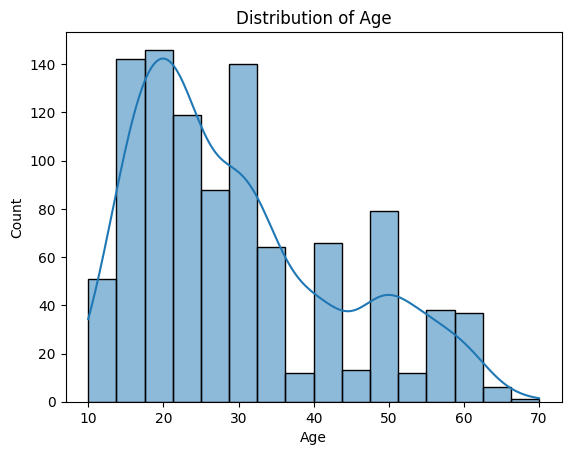

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

The Age distribustion above shows that women from age 25 to 48 are of higher risk of Maternal health issues while from age 48 to 50 also need to take precausions so that they do not suffer from Maternal health issues.

In [ ]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [ ]:
# Assign age distribution to a new column
# Define the conditions and corresponding designations: The age conditions and designation are according to WHO nad National Institute of Health.
conditions = [
    df['Age'] <= 17,
    df['Age'] <= 19,
    df['Age'] >= 45,
    df['Age'] >= 45,
    df['Age'] >= 55
]
designations = [
    'Children',
    'Adolescents',
    'Pre-menopausal Adults',
    'Menopausal Adults',
    'Post-menopausal Adults'
]

# Use numpy.select() to create the new column
df['AgeDist'] = np.select(conditions, designations, default='Older adults')

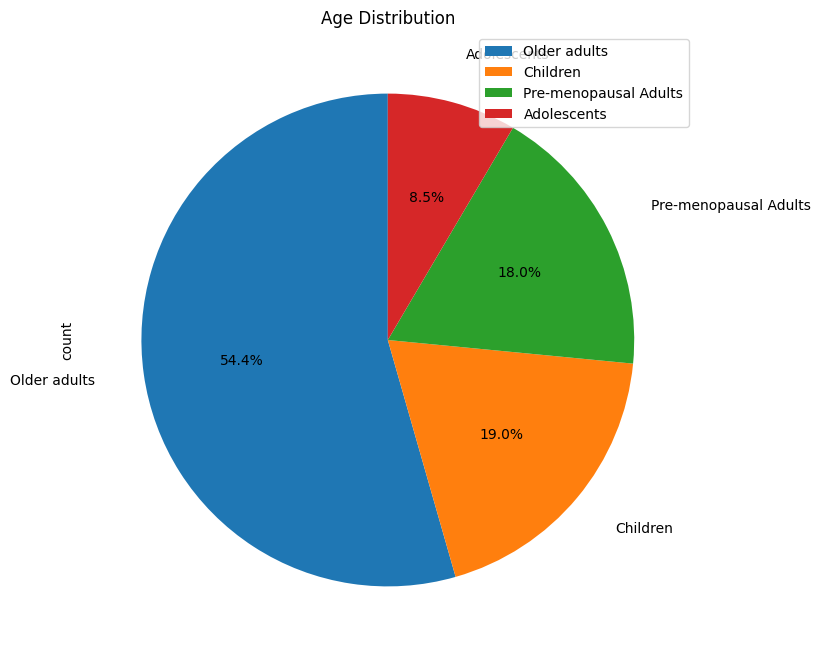

In [ ]:
# Count the frequency of each value in the 'AgeDist' column
age_dist_counts = df['AgeDist'].value_counts()

# Create a pie chart of the frequency counts
age_dist_counts.plot.pie(autopct='%1.1f%%', startangle=90, labeldistance=1.2, figsize=(8, 8), legend=True)

# Set the title of the chart
plt.title('Age Distribution')

# Show the chart
plt.show()

The age distribution above from W.H.O 2022 and National Institute on Aging shows that Older adults are of higher risk of Maternal health with 
a percentage of 54.4.

: 

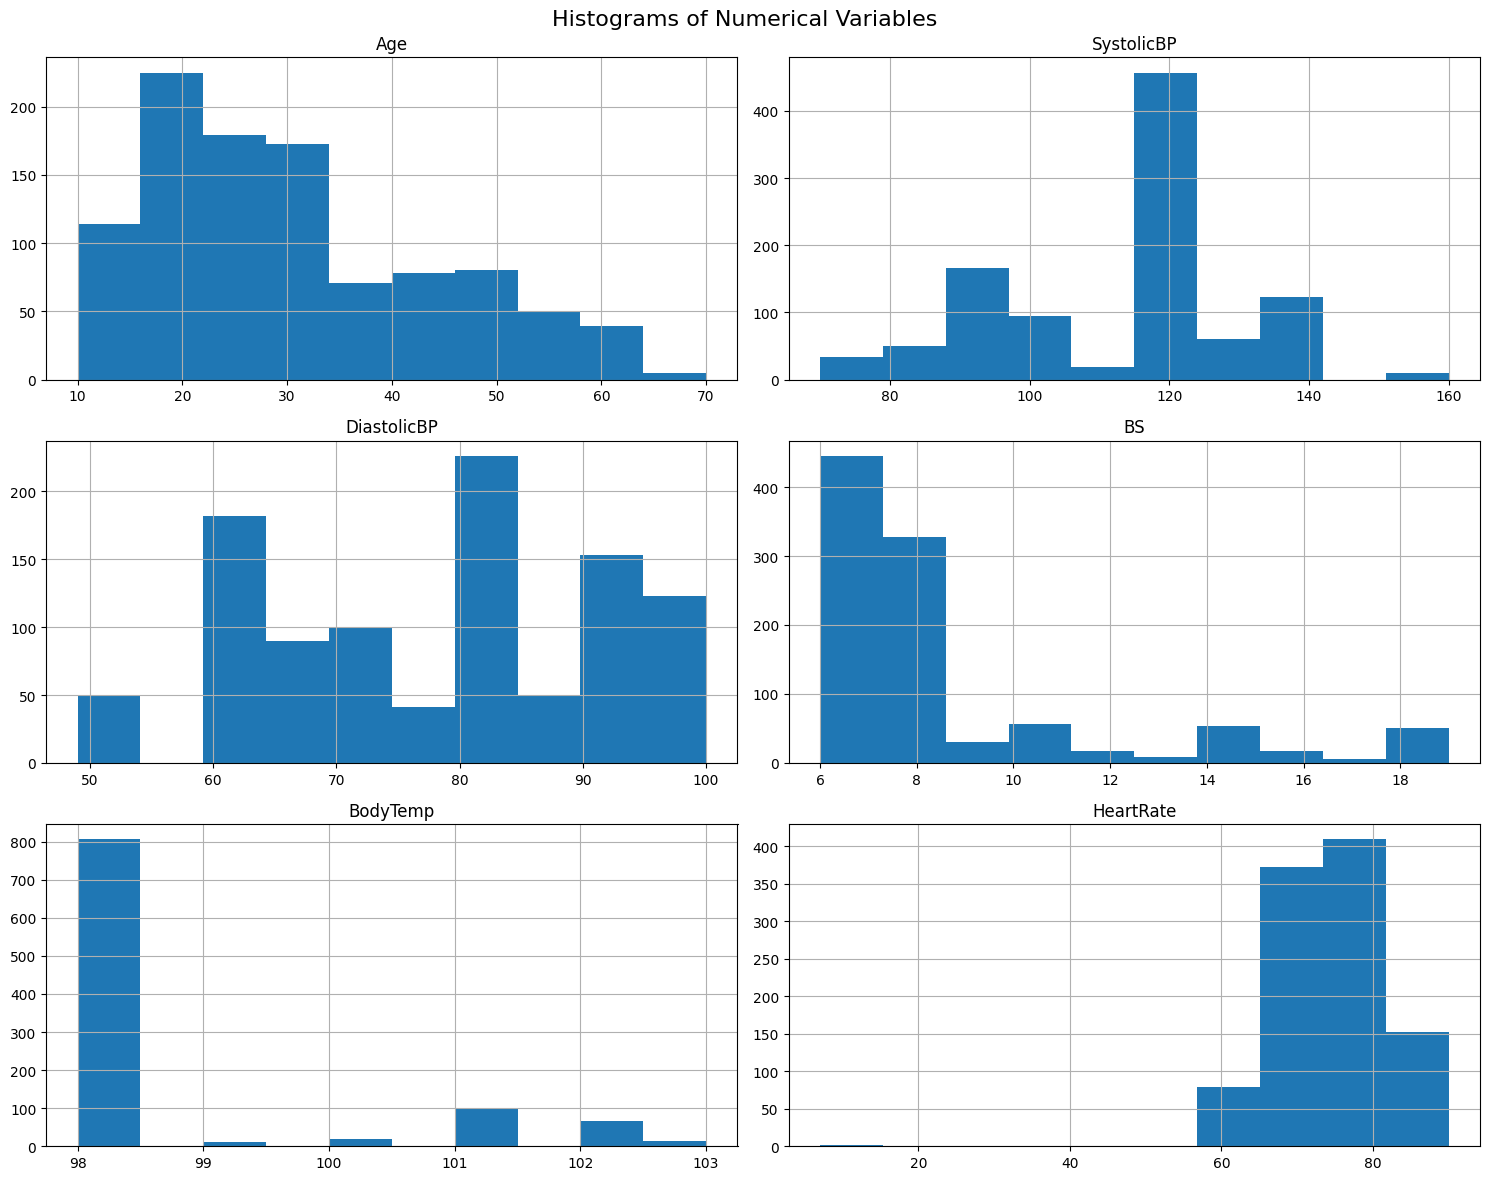

In [ ]:
# Select only the numerical columns
num_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Plot histograms for all numerical columns
df[num_cols].hist(bins=10, figsize=(15, 12))

# Add titles and axis labels
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

The Histogram plot above shows the numerical variables of the varios features analyzed in this project.

### visualize the relationship between the numerical variables and the target variable

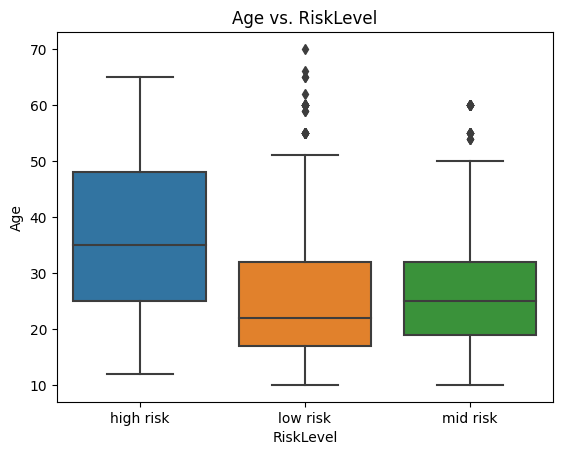

In [ ]:

sns.boxplot(x='RiskLevel', y='Age', data=df)
plt.title('Age vs. RiskLevel')
plt.show()

From the boxplot above, it shows that women from age 25 to 48 are of higher risk of maternal health risk.

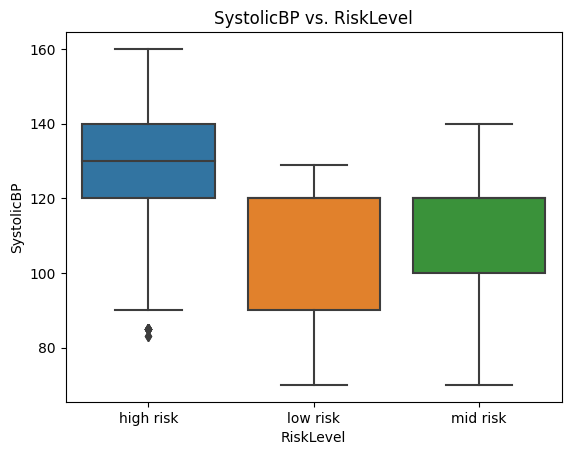

In [ ]:
sns.boxplot(x='RiskLevel', y='SystolicBP', data=df)
plt.title('SystolicBP vs. RiskLevel')
plt.show()

SystolicBP measures the pressure in the artries when the heart beats and from the above plot, women with Bp between 120 to 140 are of high risk of suffering from maternal heallth risk.

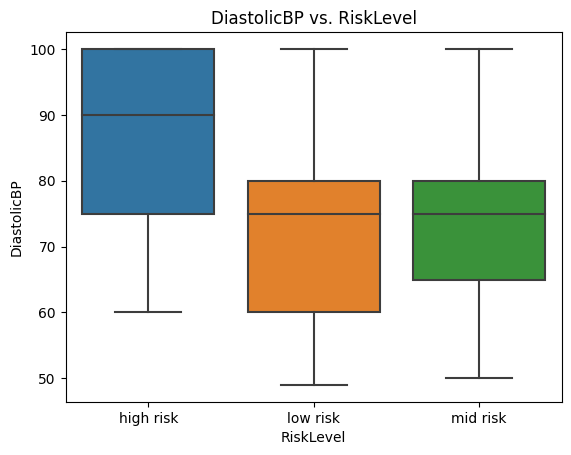

In [ ]:
sns.boxplot(x='RiskLevel', y='DiastolicBP', data=df)
plt.title('DiastolicBP vs. RiskLevel')
plt.show()

DistolicBP measures the pressure in the heart when it is at rest between beats and the boxplot above shos that women between 75 to 100 DistolicBp are of 
high risk of maternal health

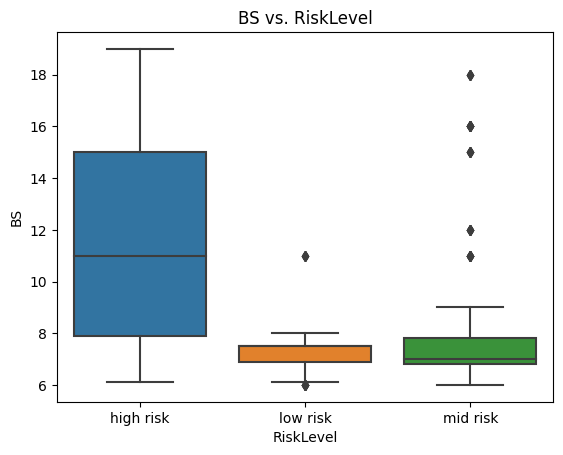

In [ ]:
sns.boxplot(x='RiskLevel', y='BS', data=df)
plt.title('BS vs. RiskLevel')
plt.show()

BS is the blood glucose level also knon as blood sugar level, women between 8 to 14.5 blood sugar level are of high risk of maternal health as shown above.

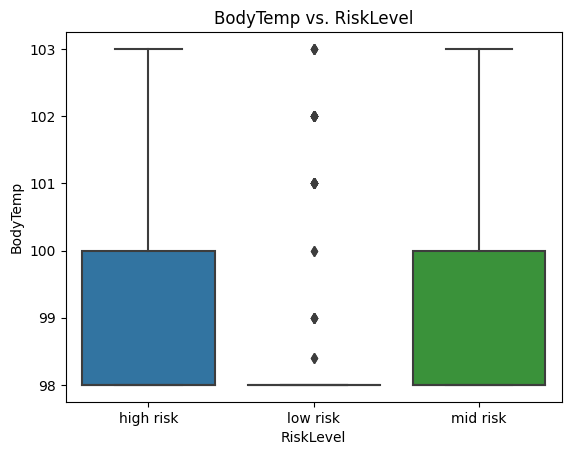

In [ ]:
sns.boxplot(x='RiskLevel', y='BodyTemp', data=df)
plt.title('BodyTemp vs. RiskLevel')
plt.show()

Body temperature of a pregnant woman and it's effect varies depending on how old the pregnancy is however, from the boxplot above shos that women with body 
temperature between 98 to 100 are both at high risk and mis risk of maternal health.

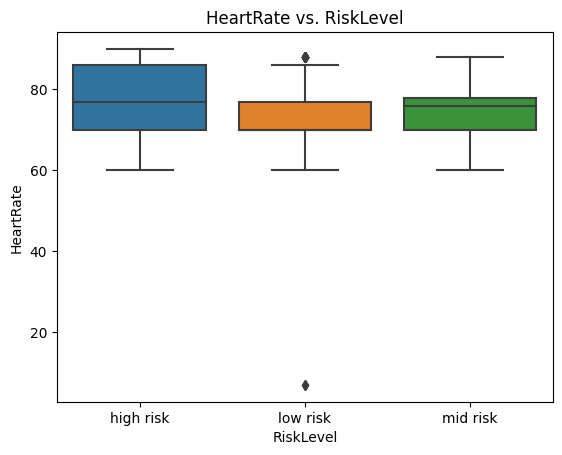

In [ ]:
sns.boxplot(x='RiskLevel', y='HeartRate', data=df)
plt.title('HeartRate vs. RiskLevel')
plt.show()

During pregnancy the amount of blood pumped by the heart increase by 30 to 50% according to research by MSD Manuels however heart rate of 67 to 90 as shown above is of maternal risk.

In [ ]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel', 'AgeDist'],
      dtype='object')

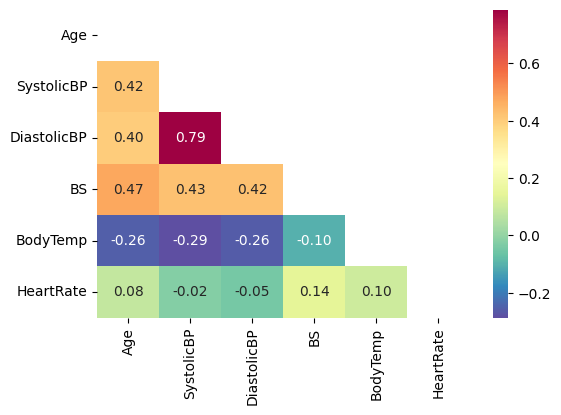

In [ ]:
# correlation analysis
corrmat = df.drop(columns=['RiskLevel', 'AgeDist']).corr()
top_corr_features = corrmat.index
mask= np.triu(top_corr_features)
plt.figure(figsize=(6,4))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True, fmt='.2f', mask=mask, cmap='Spectral_r');

More exploratory Analysis.

Univariant Analysis:


In [11]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

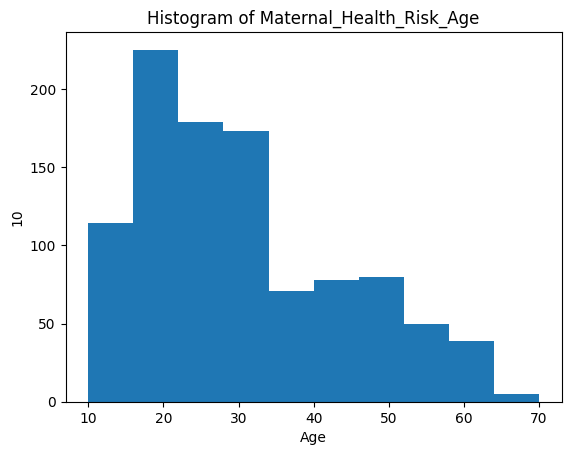

In [12]:
plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('10')
plt.title('Histogram of Maternal_Health_Risk_Age')
plt.show()

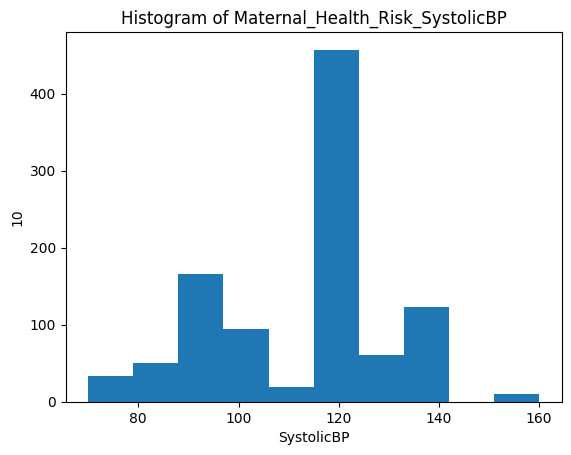

In [13]:
plt.hist(df['SystolicBP'], bins=10)
plt.xlabel('SystolicBP')
plt.ylabel('10')
plt.title('Histogram of Maternal_Health_Risk_SystolicBP')
plt.show()

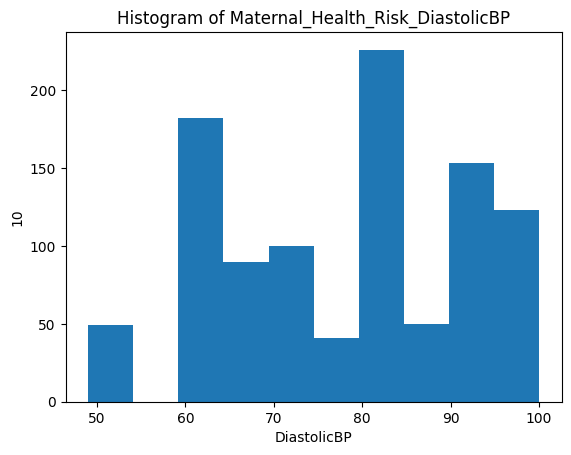

In [14]:
plt.hist(df['DiastolicBP'], bins=10)
plt.xlabel('DiastolicBP')
plt.ylabel('10')
plt.title('Histogram of Maternal_Health_Risk_DiastolicBP')
plt.show()

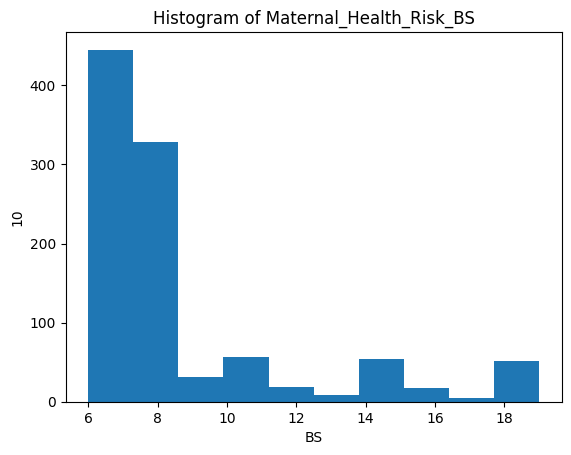

In [15]:
plt.hist(df['BS'], bins=10)
plt.xlabel('BS')
plt.ylabel('10')
plt.title('Histogram of Maternal_Health_Risk_BS')
plt.show()

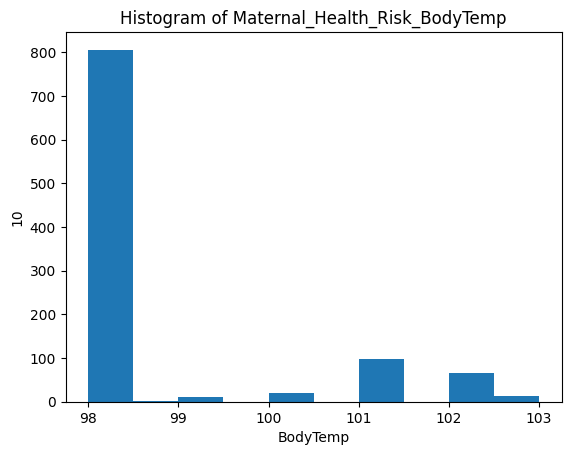

In [16]:
plt.hist(df['BodyTemp'], bins=10)
plt.xlabel('BodyTemp')
plt.ylabel('10')
plt.title('Histogram of Maternal_Health_Risk_BodyTemp')
plt.show()

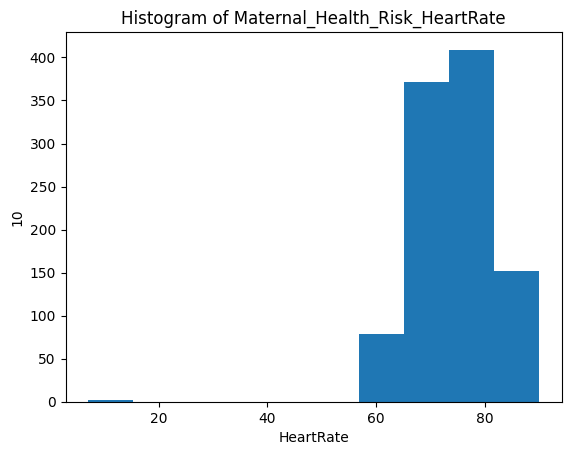

In [17]:
plt.hist(df['HeartRate'], bins=10)
plt.xlabel('HeartRate')
plt.ylabel('10')
plt.title('Histogram of Maternal_Health_Risk_HeartRate')
plt.show()

Bivariate Analysis to determaine the risk levels of each variables:

In [18]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

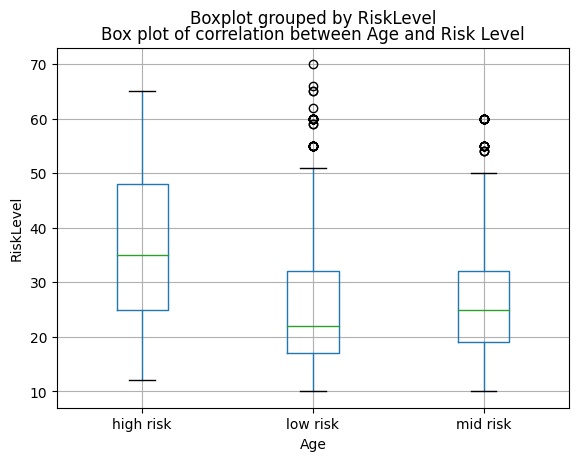

In [19]:
df.boxplot(column='Age', by='RiskLevel')
plt.xlabel('Age')
plt.ylabel('RiskLevel')
plt.title('Box plot of correlation between Age and Risk Level')
plt.show()

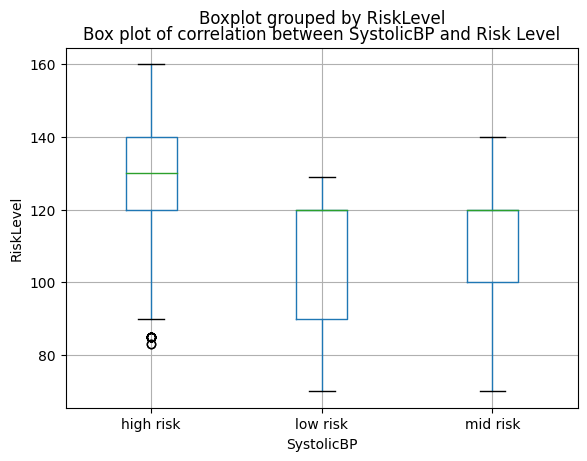

In [20]:
df.boxplot(column='SystolicBP', by='RiskLevel')
plt.xlabel('SystolicBP')
plt.ylabel('RiskLevel')
plt.title('Box plot of correlation between SystolicBP and Risk Level')
plt.show()

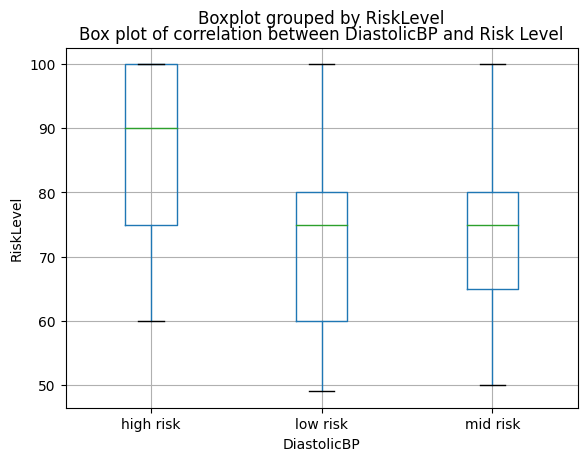

In [21]:
df.boxplot(column='DiastolicBP', by='RiskLevel')
plt.xlabel('DiastolicBP')
plt.ylabel('RiskLevel')
plt.title('Box plot of correlation between DiastolicBP and Risk Level')
plt.show()

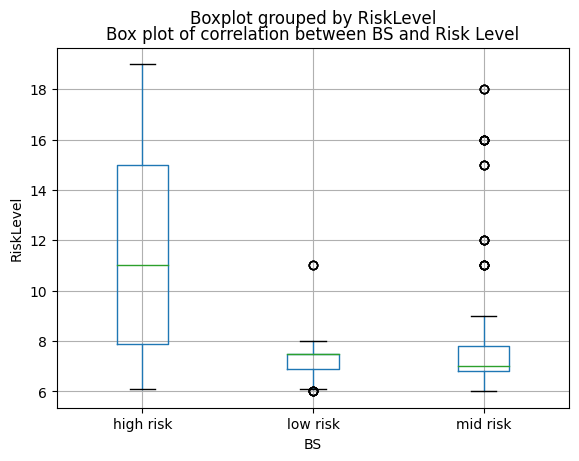

In [22]:
df.boxplot(column='BS', by='RiskLevel')
plt.xlabel('BS')
plt.ylabel('RiskLevel')
plt.title('Box plot of correlation between BS and Risk Level')
plt.show()

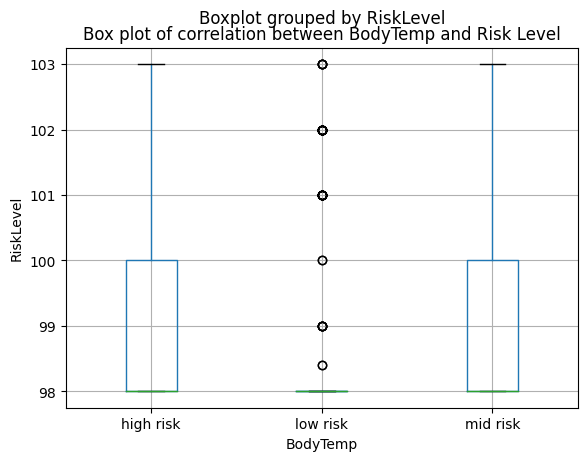

In [23]:
df.boxplot(column='BodyTemp', by='RiskLevel')
plt.xlabel('BodyTemp')
plt.ylabel('RiskLevel')
plt.title('Box plot of correlation between BodyTemp and Risk Level')
plt.show()

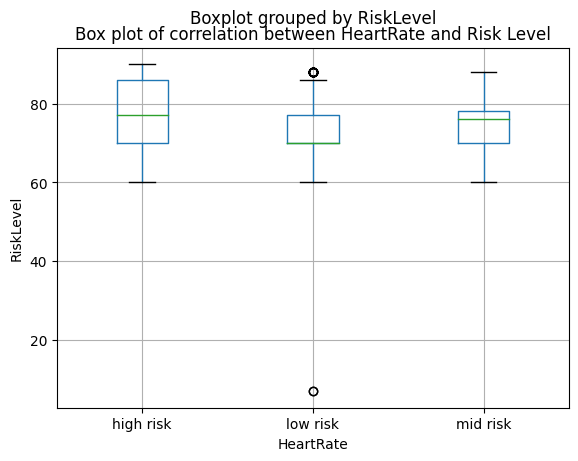

In [24]:
df.boxplot(column='HeartRate', by='RiskLevel')
plt.xlabel('HeartRate')
plt.ylabel('RiskLevel')
plt.title('Box plot of correlation between HeartRate and Risk Level')
plt.show()

The plot above shows  that heart rate between 70-90 are of high risk of maternal health.

In [ ]:
# outlier detection

: 

## Modeling

In [ ]:
from sklearn.preprocessing

: 

: 